In [2]:
import pandas as pd # 데이터를 처리하기 위한 가장 기본적인 패키지
import json
import re     
import os
import glob
from pandas import DataFrame
from collections import Counter
from konlpy.tag import Twitter
from konlpy.tag import Kkma
from konlpy.tag import Mecab
import numpy as np
import matplotlib as mpl
from wordcloud import WordCloud
import matplotlib.pylab as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname = 'C:\\Windows\\Fonts\\malgun.ttf').get_name()
plt.rc('font', family = font_name)
mpl.rcParams['axes.unicode_minus'] = False

from tqdm import tqdm_notebook

### 날짜데이터 정제

In [3]:
## 댓글 파일이 있는 유튜버만 만들어주세요.
df = pd.read_csv('IT.csv',encoding='cp949')
name_list = df['이름'].values
print(name_list)

for name in name_list:
    
    # 각 이름에 맞는 info 파일 불러와서 데이터프레임에 저장
    df = pd.read_csv(f'{name}/{name}_info.csv')

    # column에 Unnames가 새로 생겨서 column 다시 지정해줌
    df.columns = ['', 'name', 'thumbnail', 'view', 'previous_time',
              'video_url', 'start_date', 'comment', 'likes_num', 'unlikes_num', 'time_duration']

    # start_date를 리스트로
    date_list = list(df['start_date'])

    # 날짜만 뽑아 오는 정규표현식
    p = re.compile("\d{4}[.]\s\d+[.]\s\d+[.]")

    # 정규표현식에 맞는 날짜 저장할 리스트
    new_date = []
    real_date = []

    # 날짜 저장
    for i in range(len(date_list)):
        new_date.append(re.findall(p, date_list[i]))

    real_date = np.ravel(new_date)    

    # 데이터프레임의 start_date 컬럼에 값 저장
    df.loc[:, 'start_date'] = real_date

    # info파일 덮어쓰기
    df.to_csv(f'{name}/{name}_info.csv', index = False, encoding = 'utf-8-sig')

    print(f'{name} 저장 완료')

['cdm_IT14' 'dongjun_IT20' 'fart_IT7' 'HELLOUKY_IT18' 'itsok_IT13'
 'ITSub잇섭_IT1' 'manneung_IT16' 'MRmr_IT3' 'ndolson_IT19' 'oh_IT6'
 'room_IT8' 'seoulian_IT11' 'sinsung_IT15' 'Thelog_IT12' 'UNDERkg_IT2'
 'yeungtae_IT17']
cdm_IT14 저장 완료
dongjun_IT20 저장 완료
fart_IT7 저장 완료
HELLOUKY_IT18 저장 완료
itsok_IT13 저장 완료
ITSub잇섭_IT1 저장 완료
manneung_IT16 저장 완료
MRmr_IT3 저장 완료
ndolson_IT19 저장 완료
oh_IT6 저장 완료
room_IT8 저장 완료
seoulian_IT11 저장 완료
sinsung_IT15 저장 완료
Thelog_IT12 저장 완료
UNDERkg_IT2 저장 완료
yeungtae_IT17 저장 완료


### 불용어사전 불러오기 및 수정

In [4]:
f= pd.read_csv('불용어사전(한글자).csv',encoding='cp949')
stop_list = list(f)
Unnamed = 'Unnamed: '+ str(len(stop_list)-1)
stop_list.extend(['진짜'])
stop_words = set(stop_list)

stop_words.remove(Unnamed)

# stop_words

# 단어 새로 추가했을 때에 사용!!!
f = open('불용어사전(한글자).csv','w')
for i in stop_words:
    f.write(i+',')
f.close()

### 인코딩 에러뜰 때 순차로 실행('euc-kr' or 'cp949')

In [ ]:
# # #인코딩 에러뜰때만 실행
# youtube_channel = input("유투브 채널 이름 입력하시오.")
# date = pd.read_csv(youtube_channel+'/'+youtube_channel+'_info.csv',encoding='cp949')

In [ ]:
# # #인코딩 에러뜰때만 실행


# date.to_csv(youtube_channel+'/'+youtube_channel+'_info.csv',encoding='utf-8-sig',index=False)

In [7]:
df = pd.read_csv('IT리스트.csv',encoding='cp949')
name_list = df['이름'].values
# name_list = np.delete(name_list, 4)
name_list

array(['cdm_IT14', 'dongjun_IT20', 'fart_IT7', 'HELLOUKY_IT18',
       'itsok_IT13', 'ITSub잇섭_IT1', 'manneung_IT16', 'MRmr_IT3',
       'ndolson_IT19', 'oh_IT6', 'room_IT8', 'seoulian_IT11',
       'sinsung_IT15', 'Thelog_IT12', 'UNDERkg_IT2', 'yeungtae_IT17'],
      dtype=object)

## 텍스트 마이닝 시작

현재 유튜버 : cdm_IT14
['2020. 6. 2.']
['2020. 6. 2.']
['2020. 6. 1.']
['2020. 5. 28.']
['2020. 5. 27.']
['2020. 5. 20.']
['2020. 5. 19.']
['2020. 5. 17.']
['2020. 5. 14.']
['2020. 5. 13.']
['2020. 5. 13.']
['2020. 5. 9.']
['2020. 5. 8.']
['2020. 5. 2.']
['2020. 5. 2.']
['2020. 4. 27.']
['2020. 4. 26.']
['2020. 4. 25.']
['2020. 4. 23.']
[]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


C:\Users\acorn\anaconda3\lib\site-packages\ipykernel_launcher.py:27: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



cdm_IT14 date 컬럼 추가 완료
cdm_IT14token_result 저장 완료


C:\Users\acorn\anaconda3\lib\site-packages\ipykernel_launcher.py:138: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



{'크롬': 65, '사용': 65, '엣지': 58, '기능': 40, '제품': 37, '맨': 29, '가격': 29, '영상': 27, '브라우저': 25, '생각': 24, '씨디': 24, '스크린': 22, '같은': 22, '리뷰': 19, '듀얼': 19, '때문': 19, '구매': 19, '입니다': 18, '같네요': 18, '프로그램': 17, '웨일': 17, '문제': 16, '좋은': 15, '디자인': 15, '보고': 15, '바이러스': 15, '성능': 14, '유튜브': 14, '확장': 14, '공유기': 14}


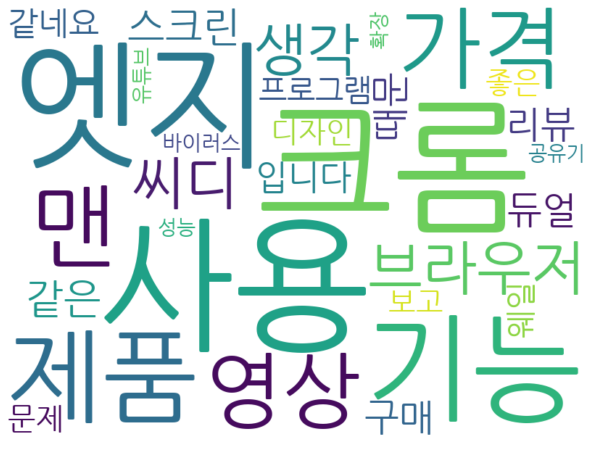

cdm_IT14word cloud 저장 완료
현재 유튜버 : dongjun_IT20
['2020. 5. 31.']
['2020. 5. 28.']
['2020. 5. 27.']
['2020. 5. 27.']
['2020. 5. 26.']
['2020. 5. 25.']
['2020. 5. 25.']
['2020. 5. 24.']
['2020. 5. 22.']
['2020. 5. 21.']
['2020. 5. 20.']
['2020. 5. 19.']
['2020. 5. 14.']
['2020. 5. 12.']
['2020. 5. 11.']
['2020. 5. 8.']
['2020. 5. 5.']
['2020. 5. 3.']
['2020. 5. 1.']
[]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19



dongjun_IT20 date 컬럼 추가 완료
dongjun_IT20token_result 저장 완료



{'아이폰': 39, '삼성': 22, '빠': 18, '애플': 17, '카메라': 17, '프로': 16, '모델': 15, '노트': 15, '갤럭시': 13, '가격': 12, '폰': 9, '인치': 9, '제발': 8, '디자인': 8, '그냥': 8, '외부': 7, '엑시노스': 7, '플립': 6, '화면': 6, '걸': 6, '맥스': 6, '생각': 6, '아이패드': 6, '말': 5, '네이비': 5, '블루': 5, '차이': 5, '건가': 5, '글래스': 5, '일반': 5}


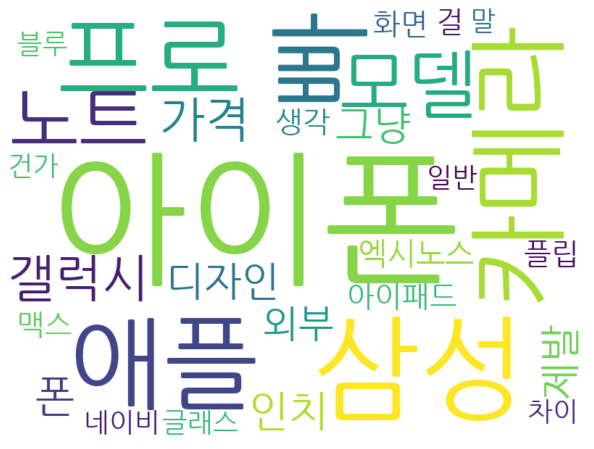

dongjun_IT20word cloud 저장 완료
현재 유튜버 : fart_IT7
['2020. 5. 30.']
['2020. 5. 27.']
['2020. 5. 23.']
['2020. 5. 21.']
['2020. 5. 19.']
['2020. 5. 15.']
['2020. 5. 14.']
['2020. 5. 10.']
['2020. 5. 9.']
['2020. 5. 6.']
['2020. 5. 6.']
['2020. 5. 4.']
['2020. 5. 1.']
['2020. 4. 29.']
['2020. 4. 25.']
['2020. 4. 23.']
['2020. 4. 19.']
['2020. 4. 18.']
['2020. 4. 15.']
[]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19



fart_IT7 date 컬럼 추가 완료
fart_IT7token_result 저장 완료



{'노트북': 203, '가격': 175, '말': 164, '벨벳': 161, '폰': 148, '제품': 130, '영상': 129, '리뷰': 127, '방구': 125, '디자인': 116, '사용': 115, '아이폰': 107, '좋은': 101, '보고': 95, '렌즈': 89, '가성': 80, '생각': 79, '성능': 78, '엘지': 77, '비': 72, '구매': 72, '키': 72, '정말': 69, '비교': 68, '삼성': 67, '입니다': 67, '보드': 67, '마우스': 63, '네이버': 62, '카메라': 61}


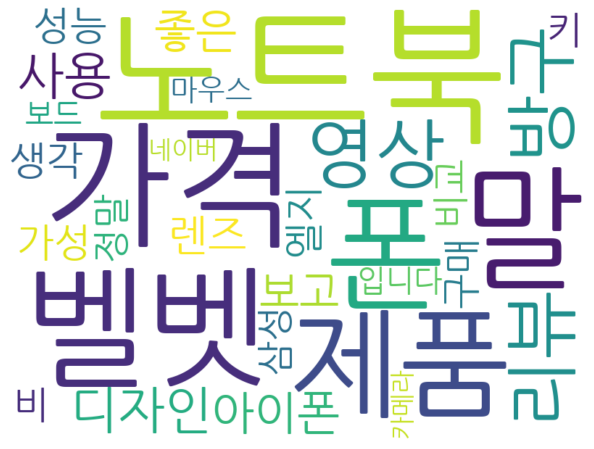

fart_IT7word cloud 저장 완료
현재 유튜버 : HELLOUKY_IT18
['2020. 6. 1.']
['2020. 5. 30.']
['2020. 5. 27.']
['2020. 5. 25.']
['2020. 5. 18.']
['2020. 5. 15.']
['2020. 5. 12.']
['2020. 5. 8.']
['2020. 5. 4.']
['2020. 4. 27.']
['2020. 4. 24.']
['2020. 4. 24.']
['2020. 4. 17.']
['2020. 4. 10.']
['2020. 4. 9.']
['2020. 4. 6.']
['2020. 4. 1.']
['2020. 3. 24.']
['2020. 3. 20.']
[]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19



HELLOUKY_IT18 date 컬럼 추가 완료
HELLOUKY_IT18token_result 저장 완료



{'영상': 130, '키': 122, '좋은': 46, '리뷰': 40, '오늘': 32, '역시': 28, '소식': 28, '보고': 27, '세대': 24, '항상': 22, '같아요': 22, '프로': 22, '입니다': 21, '가격': 20, '건강하시길': 19, '좋아요': 19, '좋네요': 18, '마이크': 18, '인트': 17, '카메라': 16, '형님': 16, '사용': 16, '정보': 16, '있는': 14, '후지': 13, '이런': 13, '고민': 13, '감사': 13, '새로운': 13, '어머님': 13}


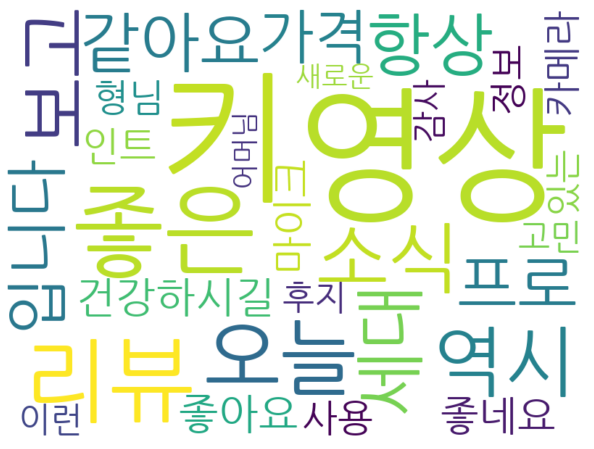

HELLOUKY_IT18word cloud 저장 완료
현재 유튜버 : itsok_IT13
['2020. 6. 2.']
['2020. 5. 29.']
['2020. 5. 26.']
['2020. 5. 25.']
['2020. 5. 22.']
['2020. 5. 18.']
['2020. 5. 13.']
['2020. 5. 11.']
['2020. 5. 7.']
['2020. 5. 1.']
['2020. 4. 28.']
['2020. 4. 24.']
['2020. 4. 21.']
['2020. 4. 14.']
['2020. 4. 4.']
['2020. 3. 28.']
['2020. 3. 24.']
['2020. 3. 21.']
['2020. 3. 17.']
[]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19



itsok_IT13 date 컬럼 추가 완료
itsok_IT13token_result 저장 완료



{'영상': 296, '아이폰': 226, '오케이': 223, '민성': 194, '인트': 171, '오늘': 143, '프로': 139, '잇츠': 122, '리뷰': 120, '매력': 108, '좋은': 98, '누나': 97, '언니': 87, '보고': 84, '가격': 77, '구독': 76, '애플': 72, '축하': 72, '같아요': 71, '노트북': 71, '좋아요': 70, '입니다': 69, '정말': 68, '생각': 67, '츠': 67, '항상': 66, '말': 65, '폰': 62, '갤럭시': 61, '제품': 60}


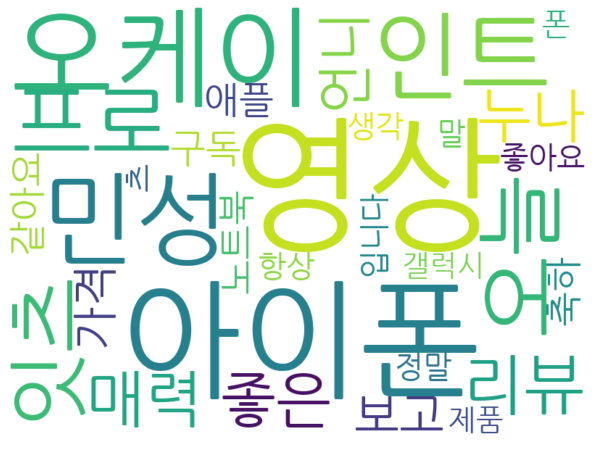

itsok_IT13word cloud 저장 완료
현재 유튜버 : ITSub잇섭_IT1
['2020. 6. 1.']
['2020. 5. 30.']
['2020. 5. 27.']
['2020. 5. 25.']
['2020. 5. 23.']
['2020. 5. 20.']
['2020. 5. 18.']
['2020. 5. 16.']
['2020. 5. 14.']
['2020. 5. 11.']
['2020. 5. 9.']
['2020. 5. 6.']
['2020. 5. 4.']
['2020. 5. 1.']
['2020. 4. 29.']
['2020. 4. 27.']
['2020. 4. 25.']
['2020. 4. 22.']
['2020. 4. 20.']
[]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19



ITSub잇섭_IT1 date 컬럼 추가 완료
ITSub잇섭_IT1token_result 저장 완료



{'형': 377, '섭': 259, '영상': 237, '인트': 180, '리뷰': 178, '키': 152, '폰': 121, '아이폰': 119, '애플': 110, '보고': 98, '삼성': 92, '보드': 92, '벨벳': 90, '개': 89, '노트북': 87, '오늘': 86, '가격': 81, '갤럭시': 58, '좋아요': 57, '스킨': 55, '엘지': 52, '말': 52, '디자인': 51, '비': 50, '역시': 48, '생각': 47, '좋은': 46, '사용': 45, '그냥': 45, '사람': 44}


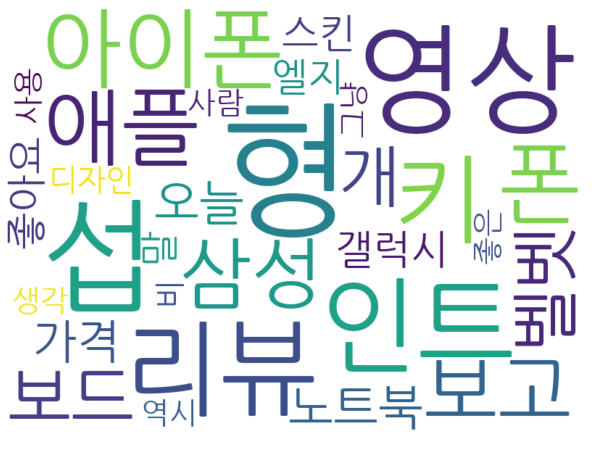

ITSub잇섭_IT1word cloud 저장 완료
현재 유튜버 : manneung_IT16
['2020. 6. 2.']
['2020. 5. 29.']
['2020. 5. 27.']
['2020. 5. 25.']
['2020. 5. 15.']
['2020. 5. 15.']
['2020. 5. 14.']
['2020. 5. 9.']
['2020. 5. 8.']
['2020. 5. 6.']
['2020. 5. 3.']
['2020. 4. 30.']
['2020. 4. 24.']
['2020. 4. 22.']
['2020. 4. 20.']
['2020. 4. 19.']
['2020. 4. 15.']
['2020. 4. 15.']
['2020. 4. 13.']
[]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19



manneung_IT16 date 컬럼 추가 완료
manneung_IT16token_result 저장 완료



{'영상': 131, '형': 88, '혁키님': 79, '인트': 78, '혁키': 76, '이어폰': 72, '만능': 68, '좋은': 66, '아이폰': 65, '리뷰': 61, '유선': 58, '오늘': 54, '폰': 50, '벨벳': 48, '역시': 44, '마스크': 35, '정보': 33, '엘지': 32, '요즘': 31, '가격': 31, '보고': 29, '사용': 28, '정말': 28, '생각': 28, '그냥': 28, '사람': 24, '이제': 24, '항상': 23, '입니다': 23, '이번': 22}


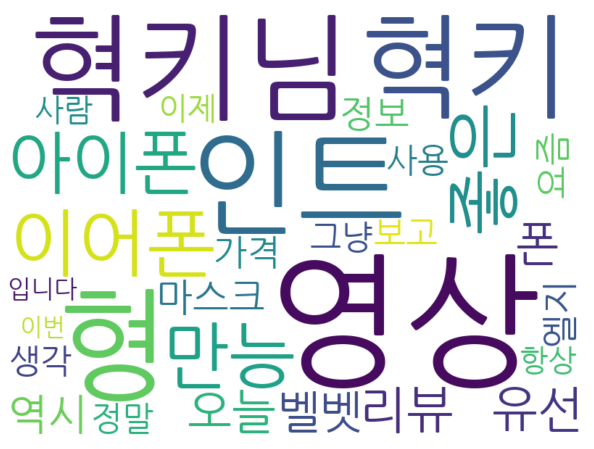

manneung_IT16word cloud 저장 완료
현재 유튜버 : MRmr_IT3
['2020. 5. 31.']
['2020. 5. 29.']
['2020. 5. 26.']
['2020. 5. 23.']
['2020. 5. 21.']
['2020. 5. 16.']
['2020. 5. 15.']
['2020. 5. 12.']
['2020. 5. 9.']
['2020. 5. 5.']
['2020. 4. 29.']
['2020. 3. 13.']
['2020. 3. 4.']
['2020. 2. 19.']
['2020. 2. 18.']
['2020. 2. 13.']
['2020. 2. 11.']
['2020. 2. 9.']
['2020. 2. 7.']
[]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19



MRmr_IT3 date 컬럼 추가 완료
MRmr_IT3token_result 저장 완료



{'아이폰': 346, '케이스': 292, '영상': 270, '형': 246, '폰': 171, '엠알님': 148, '갤럭시': 131, '노트': 121, '리뷰': 117, '보고': 112, '오늘': 91, '삼성': 84, '마리': 83, '좋은': 78, '항상': 75, '애플': 68, '버즈': 68, '청량': 67, '개': 67, '꼭': 66, '짝퉁': 63, '사람': 61, '제발': 61, '출시': 57, '프로': 56, '그냥': 56, '벨벳': 55, '색상': 53, '마스크': 53, '가격': 51}


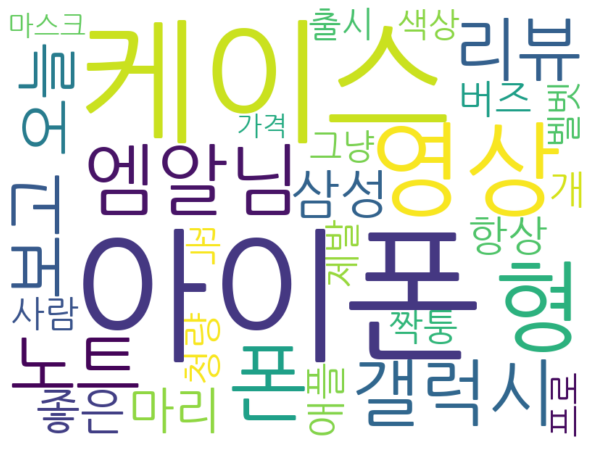

MRmr_IT3word cloud 저장 완료
현재 유튜버 : ndolson_IT19
['2020. 6. 2.']
['2020. 5. 18.']
['2020. 5. 11.']
['2020. 5. 6.']
['2020. 4. 25.']
['2020. 4. 22.']
['2020. 4. 13.']
['2020. 4. 3.']
['2020. 3. 26.']
['2020. 3. 21.']
['2020. 3. 20.']
['2020. 3. 14.']
['2020. 3. 10.']
['2020. 3. 3.']
['2020. 3. 2.']
['2020. 2. 29.']
['2020. 2. 26.']
['2020. 2. 22.']
['2020. 2. 21.']
[]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19



ndolson_IT19 date 컬럼 추가 완료
ndolson_IT19token_result 저장 완료



{'제품': 89, '와이파이': 61, '사용': 59, '좋은': 58, '기능': 48, '영상': 46, '디자인': 40, '리뷰': 36, '스피커': 35, '가격': 33, '성능': 32, '공유기': 31, '지역': 29, '같습니다': 28, '정말': 28, '음영': 27, '좋네요': 25, '구매': 23, '방수': 23, '정보': 21, '생각': 20, '점': 19, '집': 18, '지원': 17, '레트로': 17, '메시': 17, '확실히': 16, '폰': 16, '같아요': 16, '라디오': 16}


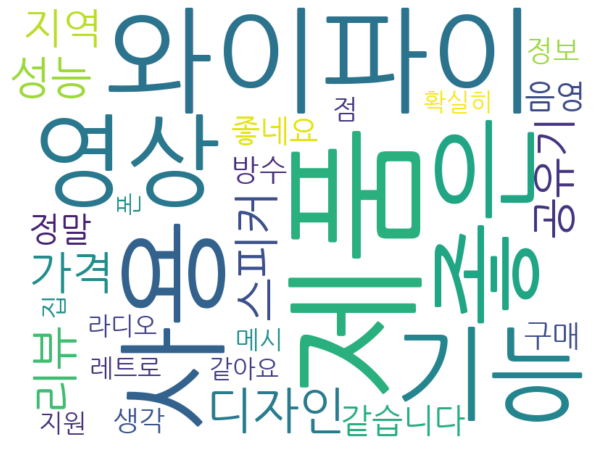

ndolson_IT19word cloud 저장 완료
현재 유튜버 : oh_IT6
['2020. 6. 2.']
['2020. 5. 26.']
['2020. 5. 24.']
['2020. 5. 22.']
['2020. 5. 21.']
['2020. 5. 19.']
['2020. 5. 10.']
['2020. 5. 8.']
['2020. 5. 5.']
['2020. 4. 27.']
['2020. 4. 24.']
['2020. 4. 21.']
['2020. 4. 13.']
['2020. 4. 10.']
['2020. 4. 6.']
['2020. 3. 27.']
['2020. 3. 24.']
['2020. 3. 18.']
['2020. 3. 13.']
[]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19



oh_IT6 date 컬럼 추가 완료
oh_IT6token_result 저장 완료



{'산다': 239, '다이슨': 211, '공기청정기': 188, '때문': 158, '쿠첸': 79, '쿠쿠': 77, '삼성': 67, '성능': 58, '제품': 57, '사용': 55, '디자인': 55, '같아요': 50, '좋은': 49, '영상': 47, '생각': 44, '공기': 43, '구매': 41, '기능': 41, '가격': 38, '그냥': 37, '비교': 35, '밥': 35, '입니다': 34, '좋아요': 32, '집': 32, '기술': 30, '사람': 28, '엘지': 27, '우리': 26, '짜파게티': 25}


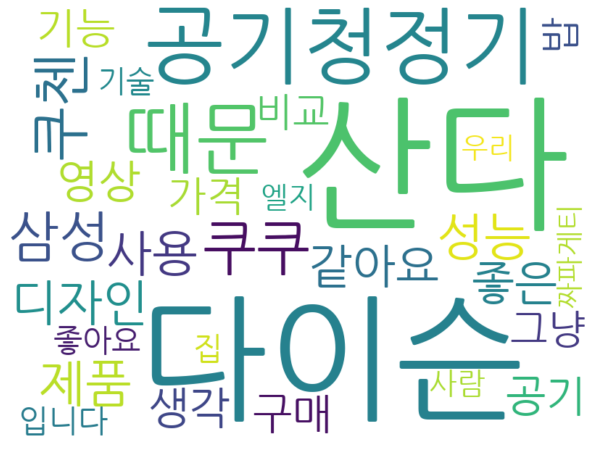

oh_IT6word cloud 저장 완료
현재 유튜버 : room_IT8
['2020. 6. 1.']
['2020. 5. 29.']
['2020. 5. 27.']
['2020. 5. 23.']
['2020. 5. 21.']
['2020. 5. 19.']
['2020. 5. 16.']
['2020. 5. 13.']
['2020. 5. 12.']
['2020. 5. 7.']
['2020. 5. 6.']
['2020. 5. 4.']
['2020. 5. 1.']
['2020. 4. 29.']
['2020. 4. 28.']
['2020. 4. 25.']
['2020. 4. 22.']
['2020. 4. 21.']
['2020. 4. 17.']
[]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19



room_IT8 date 컬럼 추가 완료
room_IT8token_result 저장 완료



{'영상': 331, '아이폰': 178, '사용': 154, '방': 153, '구석': 150, '아이패드': 142, '프로': 130, '애플': 115, '리뷰': 110, '인치': 109, '정말': 100, '보고': 92, '좋은': 91, '에어': 90, '키': 88, '세대': 88, '맥북': 83, '이번': 80, '앱': 79, '혹시': 78, '보드': 77, '정보': 75, '생각': 74, '고민': 71, '같아요': 70, '입니다': 69, '업데이트': 65, '가격': 63, '구매': 61, '있습니다': 59}


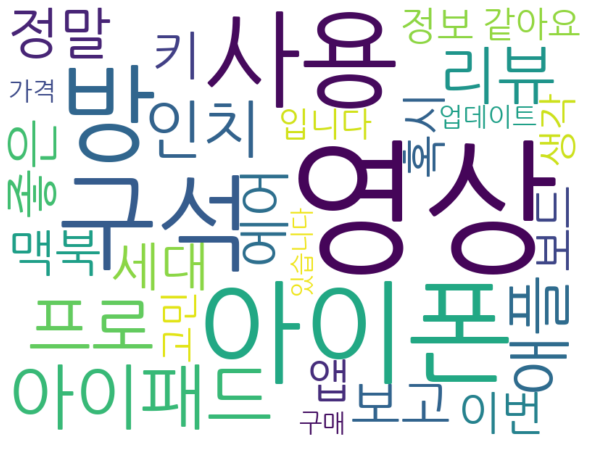

room_IT8word cloud 저장 완료
현재 유튜버 : seoulian_IT11
['2020. 6. 1.']
['2020. 5. 29.']
['2020. 5. 26.']
['2020. 5. 23.']
['2020. 5. 21.']
['2020. 5. 19.']
['2020. 5. 17.']
['2020. 5. 15.']
['2020. 5. 13.']
['2020. 5. 10.']
['2020. 5. 7.']
['2020. 5. 5.']
['2020. 5. 2.']
['2020. 4. 29.']
['2020. 4. 27.']
['2020. 4. 25.']
['2020. 4. 22.']
['2020. 4. 21.']
['2020. 4. 18.']
[]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19



seoulian_IT11 date 컬럼 추가 완료
seoulian_IT11token_result 저장 완료



{'리안': 339, '영상': 270, '리뷰': 162, '보드': 123, '키': 116, '나비': 102, '제품': 100, '좋은': 98, '가격': 97, '사용': 87, '보고': 86, '오늘': 79, '누나': 77, '입니다': 73, '애플': 72, '하나': 69, '맥북': 68, '정말': 67, '생각': 64, '역시': 60, '맥프로': 60, '돈': 58, '인트': 57, '맥': 57, '그냥': 56, '인치': 56, '카메라': 54, '서울': 52, '비': 51, '케이스': 50}


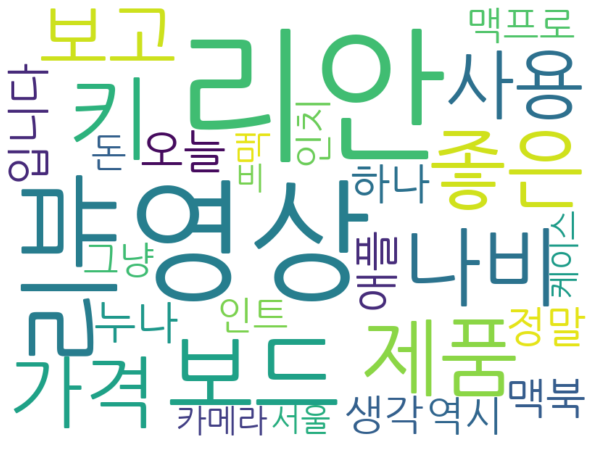

seoulian_IT11word cloud 저장 완료
현재 유튜버 : sinsung_IT15
['2020. 6. 1.']
['2020. 5. 30.']
['2020. 5. 29.']
['2020. 5. 26.']
['2020. 5. 23.']
['2020. 5. 22.']
['2020. 5. 20.']
['2020. 5. 17.']
['2020. 5. 14.']
['2020. 5. 12.']
['2020. 5. 10.']
['2020. 5. 7.']
['2020. 5. 5.']
['2020. 5. 1.']
['2020. 4. 28.']
['2020. 4. 25.']
['2020. 4. 22.']
['2020. 4. 19.']
['2020. 4. 16.']
[]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19



sinsung_IT15 date 컬럼 추가 완료
sinsung_IT15token_result 저장 완료



{'영상': 354, '인텔': 301, '가격': 218, '세대': 212, '성능': 211, '성조': 198, '게임': 198, '오버': 186, '좋은': 180, '보드': 179, '젠': 163, '생각': 152, '라이': 143, '보고': 137, '코어': 123, '정도': 120, '입니다': 116, '사용': 115, '항상': 114, '추천': 113, '램': 109, '차이': 105, '비교': 105, '가성': 97, '좋아요': 95, '비': 92, '정말': 91, '사람': 90, '그냥': 89, '지금': 85}


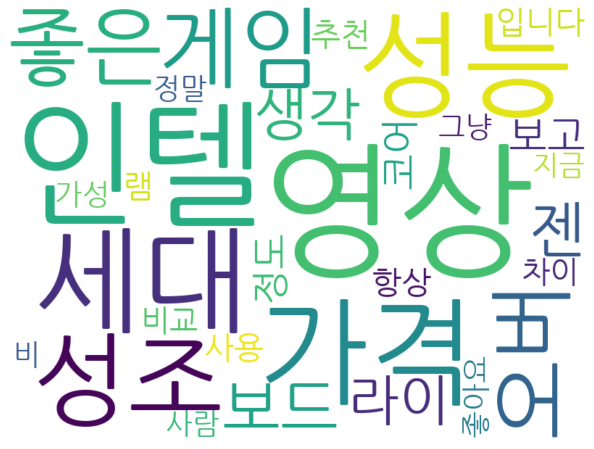

sinsung_IT15word cloud 저장 완료
현재 유튜버 : Thelog_IT12
['2020. 6. 2.']
['2020. 5. 28.']
['2020. 5. 12.']
['2020. 5. 4.']
['2020. 4. 28.']
['2020. 4. 23.']
['2020. 4. 17.']
['2020. 4. 17.']
['2020. 4. 12.']
['2020. 4. 6.']
['2020. 3. 23.']
['2020. 3. 21.']
['2020. 3. 4.']
['2020. 3. 2.']
['2020. 3. 1.']
['2020. 2. 29.']
['2020. 2. 28.']
['2020. 2. 25.']
['2020. 2. 19.']
[]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19



Thelog_IT12 date 컬럼 추가 완료
Thelog_IT12token_result 저장 완료



{'배터리': 129, '영상': 95, '아이폰': 93, '폰': 85, '형': 80, '테스트': 73, '게임': 68, '사용': 54, '갤럭시': 43, '프레임': 42, '리뷰': 41, '정도': 41, '열쓰님': 41, '지원': 39, '생각': 37, '입니다': 37, '모델': 36, '가격': 35, '화면': 33, '삼성': 31, '프로': 31, '애플': 30, '그냥': 30, '보고': 28, '세차': 28, '조루': 28, '때문': 27, '노트': 27, '제품': 25, '가요': 25}


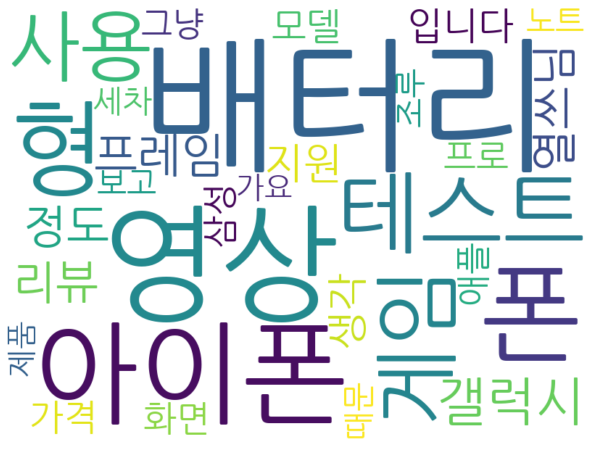

Thelog_IT12word cloud 저장 완료
현재 유튜버 : UNDERkg_IT2
['2020. 6. 1.']
['2020. 5. 28.']
['2020. 5. 25.']
['2020. 5. 24.']
['2020. 5. 22.']
['2020. 5. 21.']
['2020. 5. 19.']
['2020. 5. 18.']
['2020. 5. 15.']
['2020. 5. 13.']
['2020. 5. 9.']
['2020. 5. 6.']
['2020. 5. 5.']
['2020. 5. 4.']
['2020. 5. 3.']
['2020. 5. 1.']
['2020. 4. 30.']
['2020. 4. 28.']
['2020. 4. 27.']
[]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19



UNDERkg_IT2 date 컬럼 추가 완료
UNDERkg_IT2token_result 저장 완료



{'폰': 242, '리뷰': 167, '두목': 151, '아이폰': 145, '삼성': 120, '영상': 107, '가격': 103, '벨벳': 101, '카메라': 90, '화면': 84, '생각': 83, '스피커': 83, '배터리': 81, '갤럭시': 72, '애플': 71, '사용': 64, '그냥': 62, '보고': 59, '성능': 59, '노트': 58, '업데이트': 58, '사람': 57, '펜': 57, '말': 56, '엘지': 56, '정도': 53, '중': 51, '느낌': 50, '제품': 50, '티비': 49}


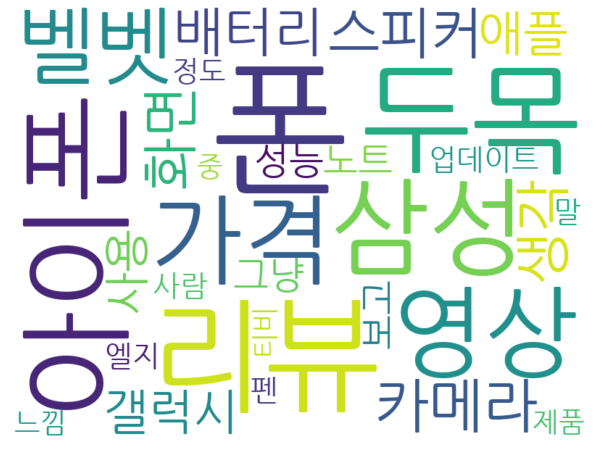

UNDERkg_IT2word cloud 저장 완료
현재 유튜버 : yeungtae_IT17
['2020. 5. 30.']
['2020. 5. 27.']
['2020. 5. 6.']
['2020. 5. 1.']
['2020. 4. 14.']
['2020. 4. 6.']
['2020. 3. 29.']
['2020. 3. 22.']
['2020. 3. 8.']
['2020. 3. 3.']
['2020. 2. 23.']
['2020. 2. 14.']
['2020. 1. 28.']
['2020. 1. 25.']
['2020. 1. 23.']
['2020. 1. 21.']
['2020. 1. 6.']
['2019. 12. 27.']
['2019. 12. 9.']
[]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19



yeungtae_IT17 date 컬럼 추가 완료
yeungtae_IT17token_result 저장 완료



{'태형': 79, '영상': 53, '제품': 50, '리뷰': 41, '충전': 38, '사용': 35, '보고': 30, '입니다': 29, '경우': 28, '구매': 27, '좋은': 25, '정말': 25, '사람': 24, '생각': 22, '충전기': 20, '항상': 20, '좋아요': 19, '포트': 19, '같아요': 19, '택배': 18, '있는': 18, '같네요': 18, '기사': 18, '정도': 17, '그냥': 16, '문제': 16, '말씀': 16, '마이크': 16, '노래방': 16, '요즘': 15}


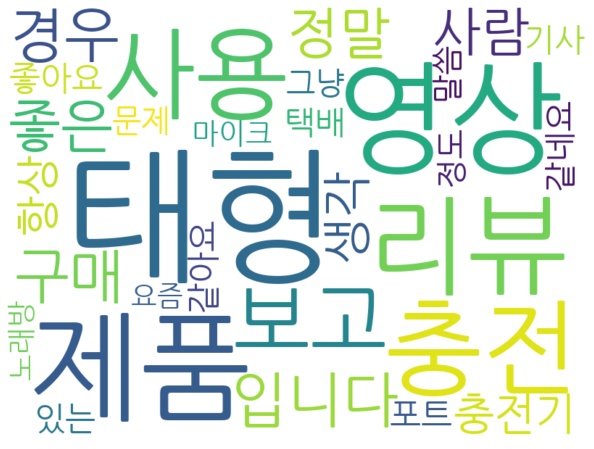

yeungtae_IT17word cloud 저장 완료


In [9]:
# 파일 합치는 곳 (폴더 제목 입력)
# 댓글에 날짜 추가!!!
for youtube_channel in name_list:
#     youtube_channel = input("유투브 채널 이름 입력하시오.")
    youtube_channel = youtube_channel
    print("현재 유튜버 : " + youtube_channel)
#     if youtube_channel :
#     date = pd.read_csv(youtube_channel+'/'+youtube_channel+'_info.csv')
    date = pd.read_csv(youtube_channel+'/'+youtube_channel+'_info.csv')
    ccc = date[date['start_date'] >= '2020. 4. 1']['start_date']

    ccc
    # pd.read_csv('./Beauty/'+youtube_channel+'/comment/'+youtube_channel+'_comment_[i+1].csv')

    for i in ccc:
         print(i)
    #     a = pd.read_csv(('./Beauty/'+youtube_channel+'/comment/'+youtube_channel+'_comment_{}.csv').format(i+1))['youtube'].values
    #     np.append(comment_date, a)     up_date = pd.read_csv(('./Beauty/'+youtube_channel+'/comment/'+youtube_channel+'_comment_{}.csv').format(i+1))
    #     comment_date.append(up_date)
    comment_date = []
    for i in range(len(ccc)):
        print(i)
        a = pd.read_csv((youtube_channel+'/comment/'+youtube_channel+'_comment_{}.csv').format(i+1))
        comment_date.append(a)

#     comment_date[0]
    for i in tqdm_notebook(range(len(ccc))):

        df = comment_date[i]
        you_id = df['youtube_id'].values
        co_id = df['comment'].values
        likes = df['like_num'].values
        start_date = ccc[i]
        comment_final = pd.DataFrame(data = {'닉네임':you_id,
                                    '댓글':co_id,
                                    '좋아요수':likes,
                                    '날짜':start_date})
        comment_final.to_csv(youtube_channel+'/comment/'+ youtube_channel +'_comment_date{}.csv'.format(i+1),
                            encoding='utf-8-sig',index=False)    

    print(youtube_channel + ' date 컬럼 추가 완료')

    path =  str(youtube_channel) + "/comment"
    path2 = str(youtube_channel) + '/result.csv'
    arg_youtube = str(youtube_channel) + "*"


    allFile_list = glob.glob(os.path.join(path,arg_youtube))
    #print(allFile_list)
    allData = []
    for file in allFile_list:
        if 'date' in file:
            # print(file)
            df = pd.read_csv(file)
            allData.append(df)

    dataCombine = pd.concat(allData,axis =0, ignore_index = True)

    dataCombine.to_csv(path2, index = False, encoding = 'utf-8-sig')
    cdPath = str(youtube_channel) + '/result.csv'
    comment_data = pd.read_csv(cdPath)
    comment_data ##제대로 출력되는지 확인
    com_list = list(comment_data['댓글'])   ##제대로 출력되는지 확인
    # com_list   ##제대로 출력되는지 확인

    # ### 추출된 단어가 무슨 형태인지 파악
    # # for sentence in com_list:
    # #     morph = twitter.pos(sentence)
    # #     sentences_tag.append(morph)

    # 추출 단어들 저장

    def get_noun(comment_txt):

        twitter = Twitter()
        noun_list = []

        if len(comment_txt) > 0:
            twitter = twitter.pos(comment_txt, norm = True, stem = True)
            for word, tag in twitter:
                if tag in ['Noun']:

                    if word not in stop_words:
                        noun_list.append(word)

        return noun_list

    def get_adj(comment_txt):

        twitter = Twitter()
        adj_list = []

        if len(comment_txt) > 0:
            twitter = twitter.pos(comment_txt, norm = True, stem = True)
            for word, tag in twitter:
                if tag in ['Adjective']:
                    if word not in stop_words:
                        adj_list.append(word)

        return adj_list

    def get_verb(comment_txt):

        twitter = Twitter()
        verb_list = []

        if len(comment_txt) > 0:
            twitter = twitter.pos(comment_txt, norm = True, stem = True)
            for word, tag in twitter:
                if tag in ['Verb']:
                    if word not in stop_words:
                        verb_list.append(word)
        return verb_list

    comment_list = []
    for i in range(len(comment_data)):
        comment_list.append(comment_data['댓글'].iloc[i])

    comment_result = []

    for i in comment_list:
        comment_result.append(i)

    comment_result = pd.DataFrame(comment_result, columns=["comment"])

    #cloud.to_file(youtube_channel+'/{}wordcloud.png'.format(youtube_channel)) # 해당폴더에 자동저장
    comment_result['noun'] = comment_result['comment'].apply(lambda x: get_noun(x))
    comment_result['adj'] = comment_result['comment'].apply(lambda x: get_adj(x))
    comment_result['verb'] = comment_result['comment'].apply(lambda x: get_verb(x))

    comment_result.to_csv(youtube_channel +'/{}token_result.csv'.format(youtube_channel),
                                                                       index = False, encoding = 'utf-8-sig')
    print(youtube_channel + 'token_result 저장 완료')

    twitter = Twitter()

    sentences_tag = []
    for sentence in tqdm_notebook(com_list):
        morph = twitter.pos(sentence)
        sentences_tag.append(morph)

    stop_words
    for sentence in comment_data:
        morph = twitter.pos(sentence)
        sentences_tag.append(morph)
    #     print(morph)
    #     print('-'*30)

    # print(sentences_tag)
    # print(len(sentences_tag))
    # print('\n'*3)

    noun_adj_list = []
    for sentence1 in sentences_tag:
        for word, tag in sentence1:
            if tag in ['Noun','Adjective','verb']:
                if word not in stop_words:
                    noun_adj_list.append(word)            

    counts = Counter(noun_adj_list)
    select_data = counts.most_common(30)


    wc = WordCloud(font_path='NanumGothic.ttf',max_font_size=200,background_color='white' ,width=800, height=600)

    print(dict(select_data))
    cloud = wc.generate_from_frequencies(dict(select_data))
    plt.figure(figsize=(12, 8))
    plt.axis('off')
    plt.imshow(cloud,interpolation='bilinear')
    plt.show()
    cloud.to_file(youtube_channel+'/{}wordcloud.png'.format(youtube_channel)) # 해당폴더에 자동저장
    
    print(youtube_channel + 'word cloud 저장 완료')